# Load Data and Wash Data

In [1]:
%matplotlib inline

import urllib.request
import json
import random

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
filename = 'employees.csv'
df = pd.read_csv(filename,sep=';')

In [3]:
df.head(2)

,Employee Name,Building,Department,ID#,Phone,Status,Hire Date,Month,Years,Benefits,Comp.,Job Rating,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,"Abbott, James",North,Quality Control,627-00-4412,(252) 824-9735,Full Time,11.05.04,May,16,DMR,78.800,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Acosta, Robert",West,Project & Contract Services,570-00-6015,(252) 223-8535,Half-Time,12.06.18,June,2,DM,66.629,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

In [5]:
df = df.rename(columns={' Comp. ' : 'Comp'})

In [6]:
df.head(2)

,Employee Name,Building,Department,ID#,Phone,Status,Hire Date,Month,Years,Benefits,Comp,Job Rating
0,"Abbott, James",North,Quality Control,627-00-4412,(252) 824-9735,Full Time,11.05.04,May,16,DMR,78.800,5
1,"Acosta, Robert",West,Project & Contract Services,570-00-6015,(252) 223-8535,Half-Time,12.06.18,June,2,DM,66.629,5


In [7]:
df = df.drop(['Building', 'Department', 'Phone', 'Hire Date', 'Status', 'Benefits', 'Month', 'Years', 'Comp', 'Job Rating'],axis = 1)

In [8]:
df.head(2)

,Employee Name,ID#
0,"Abbott, James",627-00-4412
1,"Acosta, Robert",570-00-6015


# Get unique names

In [9]:
names = map(lambda name: name.split(",")[1].strip().replace(" ","%20"), df["Employee Name"])
names = list(names)
names_unique = set(names)
names_unique = list(names_unique)

In [10]:
names_unique

['Letitia',
 'Linda',
 'LaReina',
 'Deon',
 'Lisa',
 'Madelyn',
 'Dac%20Vinh',
 'Annie',
 'Adam',
 'Meegan',
 'Deborah',
 'Johnson',
 'Douglas',
 'Desiree',
 'Marcus',
 'Ken',
 'Nicole',
 'Jim',
 'Mary%20Jo',
 'Sperry',
 'Allan',
 'Peter',
 'Fredrick',
 'Gay',
 'Rena',
 'Alexander',
 'Alicia',
 'Raquel',
 'Shannon',
 'Rick',
 'Greg',
 'Max',
 'Jody',
 'Pete',
 'Lori',
 'Jeffrey',
 'Susan',
 'Cole',
 'Allen',
 'Steve',
 'Sheryl',
 'Michelle',
 'Sherri',
 'Doug',
 'Anthony',
 'Stephen',
 'Ronald',
 'Erik',
 'Cynthia',
 'Marcia',
 'Theo',
 'Dwight',
 'Gary',
 'Steven',
 'Alfred',
 'Curtis',
 'Kes',
 'Brady',
 'Cleatis',
 'Grazyna',
 'Blane',
 'Kim',
 'Melyssa',
 'Dan',
 'Kathleen',
 'Rachel',
 'Cam',
 'Edward',
 'Jack',
 'Francisco',
 'Joanna',
 'Cassy',
 'Donald',
 'Henrietta',
 'Herb',
 'Teri',
 'Kelly',
 'Brandon',
 'Lee',
 'Christopher',
 'Heidi',
 'Jacklyn',
 'Carey',
 'Marisa',
 'Jackie',
 'Athanasios',
 'Ensley',
 'Margarita',
 'Janene',
 'Ryan',
 'Jeanne',
 'Warren',
 'Lorna',
 'G

# Get sex based on Name

In [11]:
gendered_names = []
for name_unique in names_unique:
    url = "https://api.genderize.io/?name={}&country_id=US".format(name_unique)
    with urllib.request.urlopen(url) as response:
       html = response.read()
       html = json.loads(str(html, 'utf-8'))
       gendered_names.append(html)
    print(html)

{'name': 'Letitia', 'gender': 'female', 'probability': 1, 'count': 31, 'country_id': 'US'}
{'name': 'Linda', 'gender': 'female', 'probability': 0.98, 'count': 3803, 'country_id': 'US'}
{'name': 'LaReina', 'gender': 'female', 'probability': 1, 'count': 2, 'country_id': 'US'}
{'name': 'Deon', 'gender': 'male', 'probability': 0.83, 'count': 41, 'country_id': 'US'}
{'name': 'Lisa', 'gender': 'female', 'probability': 0.99, 'count': 4043, 'country_id': 'US'}
{'name': 'Madelyn', 'gender': 'female', 'probability': 0.96, 'count': 28, 'country_id': 'US'}
{'name': 'Dac Vinh', 'gender': None, 'probability': 0, 'count': 0, 'country_id': 'US'}
{'name': 'Annie', 'gender': 'female', 'probability': 0.98, 'count': 306, 'country_id': 'US'}
{'name': 'Adam', 'gender': 'male', 'probability': 1, 'count': 10286, 'country_id': 'US'}
{'name': 'Meegan', 'gender': 'female', 'probability': 1, 'count': 8, 'country_id': 'US'}
{'name': 'Deborah', 'gender': 'female', 'probability': 0.99, 'count': 2004, 'country_id': '

{'name': 'Jeanne', 'gender': 'female', 'probability': 0.98, 'count': 288, 'country_id': 'US'}
{'name': 'Warren', 'gender': 'male', 'probability': 0.99, 'count': 714, 'country_id': 'US'}
{'name': 'Lorna', 'gender': 'female', 'probability': 0.97, 'count': 75, 'country_id': 'US'}
{'name': 'Guy', 'gender': 'male', 'probability': 0.99, 'count': 604, 'country_id': 'US'}
{'name': 'Grant', 'gender': 'male', 'probability': 1, 'count': 851, 'country_id': 'US'}
{'name': 'Dominic', 'gender': 'male', 'probability': 0.99, 'count': 678, 'country_id': 'US'}
{'name': 'Tamara', 'gender': 'female', 'probability': 0.98, 'count': 452, 'country_id': 'US'}
{'name': 'Stephanie', 'gender': 'female', 'probability': 0.99, 'count': 2129, 'country_id': 'US'}
{'name': 'Elaine', 'gender': 'female', 'probability': 0.97, 'count': 387, 'country_id': 'US'}
{'name': 'Clint', 'gender': 'male', 'probability': 1, 'count': 828, 'country_id': 'US'}
{'name': 'Janice', 'gender': 'female', 'probability': 0.98, 'count': 654, 'cou

{'name': 'Jessica', 'gender': 'female', 'probability': 0.99, 'count': 2785, 'country_id': 'US'}
{'name': 'Teresa', 'gender': 'female', 'probability': 0.99, 'count': 1285, 'country_id': 'US'}
{'name': 'Elbert', 'gender': 'male', 'probability': 0.98, 'count': 52, 'country_id': 'US'}
{'name': 'Marilyn', 'gender': 'female', 'probability': 0.98, 'count': 498, 'country_id': 'US'}
{'name': 'Boyd', 'gender': 'male', 'probability': 0.98, 'count': 99, 'country_id': 'US'}
{'name': 'Neill', 'gender': 'male', 'probability': 1, 'count': 20, 'country_id': 'US'}
{'name': 'Angela', 'gender': 'female', 'probability': 0.99, 'count': 2394, 'country_id': 'US'}
{'name': 'Carl', 'gender': 'male', 'probability': 0.99, 'count': 2237, 'country_id': 'US'}
{'name': 'Polly', 'gender': 'female', 'probability': 0.96, 'count': 53, 'country_id': 'US'}
{'name': 'Kristina', 'gender': 'female', 'probability': 0.99, 'count': 438, 'country_id': 'US'}
{'name': 'Alexandra', 'gender': 'female', 'probability': 0.97, 'count': 3

{'name': 'Sandi', 'gender': 'female', 'probability': 0.94, 'count': 94, 'country_id': 'US'}
{'name': 'Verna', 'gender': 'female', 'probability': 1, 'count': 35, 'country_id': 'US'}
{'name': 'Lincoln', 'gender': 'male', 'probability': 1, 'count': 116, 'country_id': 'US'}
{'name': 'Dawn', 'gender': 'female', 'probability': 0.97, 'count': 1317, 'country_id': 'US'}
{'name': 'Jenny', 'gender': 'female', 'probability': 0.98, 'count': 690, 'country_id': 'US'}
{'name': 'Nancy', 'gender': 'female', 'probability': 0.98, 'count': 2031, 'country_id': 'US'}
{'name': 'Leonard', 'gender': 'male', 'probability': 1, 'count': 985, 'country_id': 'US'}
{'name': 'Amy', 'gender': 'female', 'probability': 0.98, 'count': 2440, 'country_id': 'US'}
{'name': 'Tim', 'gender': 'male', 'probability': 1, 'count': 5896, 'country_id': 'US'}
{'name': 'Lynette', 'gender': 'female', 'probability': 0.99, 'count': 137, 'country_id': 'US'}
{'name': 'Craig', 'gender': 'male', 'probability': 1, 'count': 4424, 'country_id': 'U

{'name': 'Karin', 'gender': 'female', 'probability': 0.95, 'count': 133, 'country_id': 'US'}
{'name': 'Terry', 'gender': 'male', 'probability': 0.89, 'count': 3272, 'country_id': 'US'}
{'name': 'Debbie', 'gender': 'female', 'probability': 0.99, 'count': 1108, 'country_id': 'US'}
{'name': 'Duane', 'gender': 'male', 'probability': 1, 'count': 686, 'country_id': 'US'}
{'name': 'Patrick', 'gender': 'male', 'probability': 1, 'count': 7919, 'country_id': 'US'}
{'name': 'Harold', 'gender': 'male', 'probability': 0.99, 'count': 1194, 'country_id': 'US'}
{'name': 'Catherine', 'gender': 'female', 'probability': 0.99, 'count': 906, 'country_id': 'US'}
{'name': 'Lateef', 'gender': 'male', 'probability': 0.92, 'count': 12, 'country_id': 'US'}
{'name': 'Barbara', 'gender': 'female', 'probability': 0.98, 'count': 2270, 'country_id': 'US'}
{'name': 'Keith', 'gender': 'male', 'probability': 0.99, 'count': 4777, 'country_id': 'US'}
{'name': 'Bacardi', 'gender': None, 'probability': 0, 'count': 0, 'count

In [12]:
gendered_names_DF = pd.DataFrame(gendered_names)
gendered_names_DF

,name,gender,probability,count,country_id
0,Letitia,female,1.00,31,US
1,Linda,female,0.98,3803,US
2,LaReina,female,1.00,2,US
3,Deon,male,0.83,41,US
4,Lisa,female,0.99,4043,US
...,...,...,...,...,...
371,Jose,male,0.99,4360,US
372,Larry,male,0.99,4420,US
373,William,male,0.99,19876,US
374,Juan,male,0.99,2760,US


# Merge two DataFrame together

In [13]:
first_names = list(map(lambda name: name.split(",")[1].strip().replace(" ","%20"), df["Employee Name"]))

In [14]:
df["FirstNames"] = first_names

In [15]:
df_with_gender = pd.merge(df,gendered_names_DF,left_on='FirstNames',right_on='name').drop('name', axis=1)

In [16]:
df_with_gender.to_excel("df_with_gender.xlsx")

In [17]:
df_with_gender

,Employee Name,ID#,FirstNames,gender,probability,count,country_id
0,"Abbott, James",627-00-4412,James,male,0.99,30536,US
1,"Dudley, James",964-00-3524,James,male,0.99,30536,US
2,"Finley, James",444-00-9297,James,male,0.99,30536,US
3,"Sandoval, James",853-00-8713,James,male,0.99,30536,US
4,"Tucker, James",783-00-4212,James,male,0.99,30536,US
...,...,...,...,...,...,...,...
733,"Woodward, Tim",533-00-6888,Tim,male,1.00,5896,US
734,"Wright, Brad",665-00-3893,Brad,male,1.00,4271,US
735,"Wyatt, Kelly",796-00-5092,Kelly,female,0.63,2987,US
736,"Yates, Doug",975-00-7784,Doug,male,1.00,1945,US


# Get the Age based on Name

In [18]:
Age_names = []
for name_unique in names_unique:
    url = "https://api.agify.io/?name={}&country_id=US".format(name_unique)
    with urllib.request.urlopen(url) as response:
       html = response.read()
       html = json.loads(str(html, 'utf-8'))
       Age_names.append(html)
    print(html)

{'name': 'Letitia', 'age': 36, 'count': 29, 'country_id': 'US'}
{'name': 'Linda', 'age': 60, 'count': 741, 'country_id': 'US'}
{'name': 'LaReina', 'age': 46, 'count': 2, 'country_id': 'US'}
{'name': 'Deon', 'age': 54, 'count': 41, 'country_id': 'US'}
{'name': 'Lisa', 'age': 56, 'count': 727, 'country_id': 'US'}
{'name': 'Madelyn', 'age': 65, 'count': 23, 'country_id': 'US'}
{'name': 'Dac Vinh', 'age': None, 'count': 0, 'country_id': 'US'}
{'name': 'Annie', 'age': 62, 'count': 84, 'country_id': 'US'}
{'name': 'Adam', 'age': 65, 'count': 123, 'country_id': 'US'}
{'name': 'Meegan', 'age': 46, 'count': 8, 'country_id': 'US'}
{'name': 'Deborah', 'age': 68, 'count': 1407, 'country_id': 'US'}
{'name': 'Johnson', 'age': 59, 'count': 119, 'country_id': 'US'}
{'name': 'Douglas', 'age': 64, 'count': 2624, 'country_id': 'US'}
{'name': 'Desiree', 'age': 57, 'count': 124, 'country_id': 'US'}
{'name': 'Marcus', 'age': 58, 'count': 238, 'country_id': 'US'}
{'name': 'Ken', 'age': 65, 'count': 974, 'cou

{'name': 'Jaime', 'age': 60, 'count': 112, 'country_id': 'US'}
{'name': 'Janine', 'age': 65, 'count': 85, 'country_id': 'US'}
{'name': 'Vicki', 'age': 66, 'count': 471, 'country_id': 'US'}
{'name': 'Carrie', 'age': 52, 'count': 540, 'country_id': 'US'}
{'name': 'Dana', 'age': 52, 'count': 238, 'country_id': 'US'}
{'name': 'Benning', 'age': None, 'count': 0, 'country_id': 'US'}
{'name': 'Don', 'age': 67, 'count': 1035, 'country_id': 'US'}
{'name': 'Timothy', 'age': 46, 'count': 5689, 'country_id': 'US'}
{'name': 'Jeff', 'age': 69, 'count': 2670, 'country_id': 'US'}
{'name': 'Janet', 'age': 67, 'count': 518, 'country_id': 'US'}
{'name': 'Cherie', 'age': 54, 'count': 98, 'country_id': 'US'}
{'name': 'Chad', 'age': 35, 'count': 4533, 'country_id': 'US'}
{'name': 'Lesa', 'age': 58, 'count': 46, 'country_id': 'US'}
{'name': 'Randy', 'age': 46, 'count': 2562, 'country_id': 'US'}
{'name': 'Glenn', 'age': 64, 'count': 1089, 'country_id': 'US'}
{'name': 'Michael', 'age': 68, 'count': 875, 'count

{'name': 'Robin', 'age': 65, 'count': 757, 'country_id': 'US'}
{'name': 'Faye', 'age': 69, 'count': 67, 'country_id': 'US'}
{'name': 'Ewan', 'age': 31, 'count': 3, 'country_id': 'US'}
{'name': 'Kathryn', 'age': 64, 'count': 506, 'country_id': 'US'}
{'name': 'Shawn', 'age': 41, 'count': 3450, 'country_id': 'US'}
{'name': 'Leslie', 'age': 44, 'count': 663, 'country_id': 'US'}
{'name': 'Shaun', 'age': 38, 'count': 891, 'country_id': 'US'}
{'name': 'Robert', 'age': 70, 'count': 599, 'country_id': 'US'}
{'name': 'Sumed', 'age': None, 'count': 0, 'country_id': 'US'}
{'name': 'Joseph', 'age': 56, 'count': 2139, 'country_id': 'US'}
{'name': 'Ruben', 'age': 59, 'count': 137, 'country_id': 'US'}
{'name': 'Sandi', 'age': 60, 'count': 83, 'country_id': 'US'}
{'name': 'Verna', 'age': 67, 'count': 23, 'country_id': 'US'}
{'name': 'Lincoln', 'age': 55, 'count': 104, 'country_id': 'US'}
{'name': 'Dawn', 'age': 60, 'count': 911, 'country_id': 'US'}
{'name': 'Jenny', 'age': 66, 'count': 70, 'country_id'

In [19]:
df_age_names=pd.DataFrame(Age_names)

In [20]:
df_with_gender_age=pd.merge(df_with_gender, df_age_names,left_on='FirstNames', right_on= 'name').drop('name', axis=1)

In [21]:
df_with_gender_age

,Employee Name,ID#,FirstNames,gender,probability,count_x,country_id_x,age,count_y,country_id_y
0,"Abbott, James",627-00-4412,James,male,0.99,30536,US,57.0,2327,US
1,"Dudley, James",964-00-3524,James,male,0.99,30536,US,57.0,2327,US
2,"Finley, James",444-00-9297,James,male,0.99,30536,US,57.0,2327,US
3,"Sandoval, James",853-00-8713,James,male,0.99,30536,US,57.0,2327,US
4,"Tucker, James",783-00-4212,James,male,0.99,30536,US,57.0,2327,US
...,...,...,...,...,...,...,...,...,...,...
733,"Woodward, Tim",533-00-6888,Tim,male,1.00,5896,US,49.0,1474,US
734,"Wright, Brad",665-00-3893,Brad,male,1.00,4271,US,35.0,2674,US
735,"Wyatt, Kelly",796-00-5092,Kelly,female,0.63,2987,US,62.0,1103,US
736,"Yates, Doug",975-00-7784,Doug,male,1.00,1945,US,58.0,1634,US


# Make Histogram with Gender and Age

In [22]:
df_with_gender_age['gender'].fillna(0)

0        male
1        male
2        male
3        male
4        male
        ...  
733      male
734      male
735    female
736      male
737      male
Name: gender, Length: 738, dtype: object

In [23]:
# delet the rows with NaN value
df_with_gender_age.dropna(subset=['gender'], inplace=True)

In [24]:
age_female = df_with_gender_age.age[df_with_gender_age.gender == 'female']
age_male = df_with_gender_age.age[df_with_gender_age.gender == 'male']

In [25]:
bins = np.arange(df_with_gender_age.age.min(), df_with_gender_age.age.max(), 2)

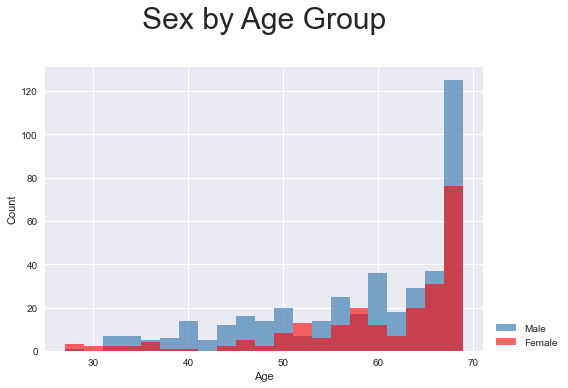

In [26]:
plt.style.use('seaborn')
plt.hist(age_male, bins = bins, label = 'Male', color = 'steelblue', alpha = 0.7)
plt.hist(age_female, bins = bins, label = 'Female', color = 'red', alpha = 0.6)
plt.title('Sex by Age Group\n', fontsize = 30)
plt.xlabel('Age')
plt.ylabel('Count')
plt.tick_params(top='off', right='off')
plt.legend(loc=(1.02,0))
plt.tight_layout()
plt.savefig('Sex by Age Group.png', dpi = 300)

# Get the marital status based on Age

In [27]:
def marriage_calculator(age):
    if age in range(0,17):
        married_variable = ['Unmarried','Married']
        married = random.choices(married_variable,weights=[99.94,100-99.94],k=1)
        return married[0]
    elif age in range(18,24):
        married_variable = ['Unmarried','Married']
        married = random.choices(married_variable,weights=[91,100-91],k=1)
        return married[0]
    elif age in range(25,34):
        married_variable = ['Unmarried','Married']
        married = random.choices(married_variable,weights=[56,100-56],k=1)
        return married[0]
    elif age in range(35,44):
        married_variable = ['Unmarried','Married']
        married = random.choices(married_variable,weights=[38,100-38],k=1)
        return married[0]
    else:
        married_variable = ['Unmarried','Married']
        married = random.choices(married_variable,weights=[39,100-39],k=1)
        return married[0]

In [28]:
marriage_calculator(7)

'Unmarried'

In [29]:
marital_status = list(map(lambda age: marriage_calculator(age), df_with_gender_age['age']))

In [30]:
df_with_gender_age['marital_status'] = marital_status

In [31]:
df_with_gender_age

,Employee Name,ID#,FirstNames,gender,probability,count_x,country_id_x,age,count_y,country_id_y,marital_status
0,"Abbott, James",627-00-4412,James,male,0.99,30536,US,57.0,2327,US,Married
1,"Dudley, James",964-00-3524,James,male,0.99,30536,US,57.0,2327,US,Unmarried
2,"Finley, James",444-00-9297,James,male,0.99,30536,US,57.0,2327,US,Unmarried
3,"Sandoval, James",853-00-8713,James,male,0.99,30536,US,57.0,2327,US,Married
4,"Tucker, James",783-00-4212,James,male,0.99,30536,US,57.0,2327,US,Married
...,...,...,...,...,...,...,...,...,...,...,...
733,"Woodward, Tim",533-00-6888,Tim,male,1.00,5896,US,49.0,1474,US,Married
734,"Wright, Brad",665-00-3893,Brad,male,1.00,4271,US,35.0,2674,US,Married
735,"Wyatt, Kelly",796-00-5092,Kelly,female,0.63,2987,US,62.0,1103,US,Unmarried
736,"Yates, Doug",975-00-7784,Doug,male,1.00,1945,US,58.0,1634,US,Unmarried


In [32]:
df_with_gender_age.to_excel('df_with_gender_age_marital.xlsx')

# Determine the Customer is a coffee drinker or not

In [33]:
def coffee_drinker(age):
    if age in range(0,17):
        drink_variable = ['Do_not_drink','drink']
        drink = random.choices(drink_variable,weights=[100,100-100],k=1)
        return drink[0]
    
    elif age in range(18,24):
        drink_variable = ['Do_not_drink','drink']
        drink = random.choices(drink_variable,weights=[53,100-53],k=1)
        return drink[0]
    
    elif age in range(25,39):
        drink_variable = ['Do_not_drink','drink']
        drink = random.choices(drink_variable,weights=[34,100-34],k=1)
        return drink[0]
    
    elif age in range(40,59):
        drink_variable = ['Do_not_drink','drink']
        drink = random.choices(drink_variable,weights=[38,100-38],k=1)
        return drink[0]
    
    else:
        drink_variable = ['Do_not_drink','drink']
        drink = random.choices(drink_variable,weights=[28,100-28],k=1)
        return drink[0]

In [34]:
coffee_drinker(24)

'drink'

In [35]:
Coffee = list(map(lambda age: coffee_drinker(age), df_with_gender_age['age']))

In [36]:
df_with_gender_age['Coffee'] = Coffee

In [37]:
df_with_gender_age

,Employee Name,ID#,FirstNames,gender,probability,count_x,country_id_x,age,count_y,country_id_y,marital_status,Coffee
0,"Abbott, James",627-00-4412,James,male,0.99,30536,US,57.0,2327,US,Married,drink
1,"Dudley, James",964-00-3524,James,male,0.99,30536,US,57.0,2327,US,Unmarried,Do_not_drink
2,"Finley, James",444-00-9297,James,male,0.99,30536,US,57.0,2327,US,Unmarried,drink
3,"Sandoval, James",853-00-8713,James,male,0.99,30536,US,57.0,2327,US,Married,Do_not_drink
4,"Tucker, James",783-00-4212,James,male,0.99,30536,US,57.0,2327,US,Married,Do_not_drink
...,...,...,...,...,...,...,...,...,...,...,...,...
733,"Woodward, Tim",533-00-6888,Tim,male,1.00,5896,US,49.0,1474,US,Married,Do_not_drink
734,"Wright, Brad",665-00-3893,Brad,male,1.00,4271,US,35.0,2674,US,Married,drink
735,"Wyatt, Kelly",796-00-5092,Kelly,female,0.63,2987,US,62.0,1103,US,Unmarried,drink
736,"Yates, Doug",975-00-7784,Doug,male,1.00,1945,US,58.0,1634,US,Unmarried,Do_not_drink


In [38]:
df_with_gender_age.to_excel('df_with_gender_age_marital_coffee.xlsx')

# Make histogram with Age and coffee drinkers

In [39]:
age_not_coffee = df_with_gender_age.age[df_with_gender_age.Coffee == 'Do_not_drink']
age_coffee = df_with_gender_age.age[df_with_gender_age.Coffee == 'drink']

In [40]:
bins = np.arange(df_with_gender_age.age.min(), df_with_gender_age.age.max(), 2)

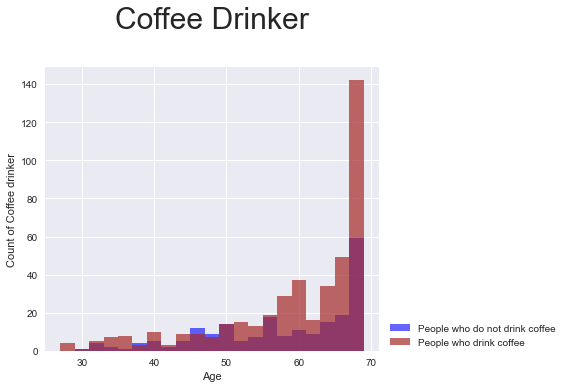

In [41]:
plt.style.use('seaborn')
plt.hist(age_not_coffee, bins = bins, label = 'People who do not drink coffee', color = 'blue', alpha = 0.6)
plt.hist(age_coffee, bins = bins, label = 'People who drink coffee', color = 'brown', alpha = 0.7)
plt.title('Coffee Drinker\n', fontsize = 30)
plt.xlabel('Age')
plt.ylabel('Count of Coffee drinker')
plt.tick_params(top='off', right='off')
plt.legend(loc=(1.02,0))
plt.tight_layout()
plt.savefig('Coffee_drinker.png', dpi = 300)

In [43]:
df_with_gender_age.columns

Index(['Employee Name', 'ID#', 'FirstNames', 'gender', 'probability',
       'count_x', 'country_id_x', 'age', 'count_y', 'country_id_y',
       'marital_status', 'Coffee'],
      dtype='object')

In [47]:
df_with_gender_age=df_with_gender_age.drop(['count_x', 'country_id_x',  'count_y', 'country_id_y'],axis=1)

In [48]:
df_with_gender_age

,Employee Name,ID#,FirstNames,gender,probability,age,marital_status,Coffee
0,"Abbott, James",627-00-4412,James,male,0.99,57.0,Married,drink
1,"Dudley, James",964-00-3524,James,male,0.99,57.0,Unmarried,Do_not_drink
2,"Finley, James",444-00-9297,James,male,0.99,57.0,Unmarried,drink
3,"Sandoval, James",853-00-8713,James,male,0.99,57.0,Married,Do_not_drink
4,"Tucker, James",783-00-4212,James,male,0.99,57.0,Married,Do_not_drink
...,...,...,...,...,...,...,...,...
733,"Woodward, Tim",533-00-6888,Tim,male,1.00,49.0,Married,Do_not_drink
734,"Wright, Brad",665-00-3893,Brad,male,1.00,35.0,Married,drink
735,"Wyatt, Kelly",796-00-5092,Kelly,female,0.63,62.0,Unmarried,drink
736,"Yates, Doug",975-00-7784,Doug,male,1.00,58.0,Unmarried,Do_not_drink


In [49]:
df_with_gender_age.to_excel("Final_Result.xlsx")